In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_json('Cell_Phones_and_Accessories.jsonl', lines=True)
df.head()

In [2]:
df = pd.read_csv('tokopedia_dataset_1754041540.csv')
df

,Nama Produk,Harga,Toko,Lokasi,Rating,Terjual
0,1 Set PC Gaming Dan Editing,5000000,R-Omota,Jakarta Timur,0.0,0.0
1,PC Gaming Komputer ex Warnet,1999999,iMba Thrift,Tangerang Selatan,0.0,0.0
2,PC GAMING PRELOVED KONDISI BAGUS,1400000,Loligames,Kab. Bandung Barat,0.0,0.0
3,PC GAMING INTEL CORE I3 10100F Gen 10 TERBARU,2850000,POINT99 COMPUTER,Bandung,4.9,100.0
4,Pc gaming murah premium package,3608000,NONSTOP GADGET,Semarang,0.0,0.0
...,...,...,...,...,...,...
527,Pc Gaming core i7 ram 32 gb gtx 4 gb fulsett,11915000,Takasima komputer,Bandung,5.0,1.0
528,pc gaming core i5 ram 32 gb gtx 4 gb ssd 256 h...,4775000,Takasima komputer,Bandung,5.0,1.0
529,PC GAMING CORE I7 8700 RAM 32 GB SSD 512 GB VG...,7300000,Takasima komputer,Bandung,5.0,4.0
530,PC GAMING CORE I7 12700F RAM 32 GB RTX 3050 SS...,16100000,Takasima komputer,Bandung,5.0,1.0


In [3]:
df_clean = df[(df['Harga'] > 1000000) & (df['Rating'] > 0) & (df['Terjual'] > 0)].copy()
df_clean

,Nama Produk,Harga,Toko,Lokasi,Rating,Terjual
3,PC GAMING INTEL CORE I3 10100F Gen 10 TERBARU,2850000,POINT99 COMPUTER,Bandung,4.9,100.0
7,[Bekas]PC Rakitan Gaming VGA Siap UNBK Kantor ...,1250000,Process Graph,Jakarta Timur,4.8,23.0
8,Komputer PC All-in-One Baru Layar Lengkung Gam...,4883700,ASVS Computer,Jakarta Pusat,5.0,1.0
11,pc gaming core i5,1500000,Rhevan Central Computindo,Tangerang Selatan,5.0,1.0
14,ASUS ROG NUC 760 NUC14SRKU7 - Ultra 7 155H/16G...,28399000,JnJ Online,Jakarta Pusat,5.0,5.0
...,...,...,...,...,...,...
527,Pc Gaming core i7 ram 32 gb gtx 4 gb fulsett,11915000,Takasima komputer,Bandung,5.0,1.0
528,pc gaming core i5 ram 32 gb gtx 4 gb ssd 256 h...,4775000,Takasima komputer,Bandung,5.0,1.0
529,PC GAMING CORE I7 8700 RAM 32 GB SSD 512 GB VG...,7300000,Takasima komputer,Bandung,5.0,4.0
530,PC GAMING CORE I7 12700F RAM 32 GB RTX 3050 SS...,16100000,Takasima komputer,Bandung,5.0,1.0


In [5]:
features = ['Harga', 'Rating', 'Terjual']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

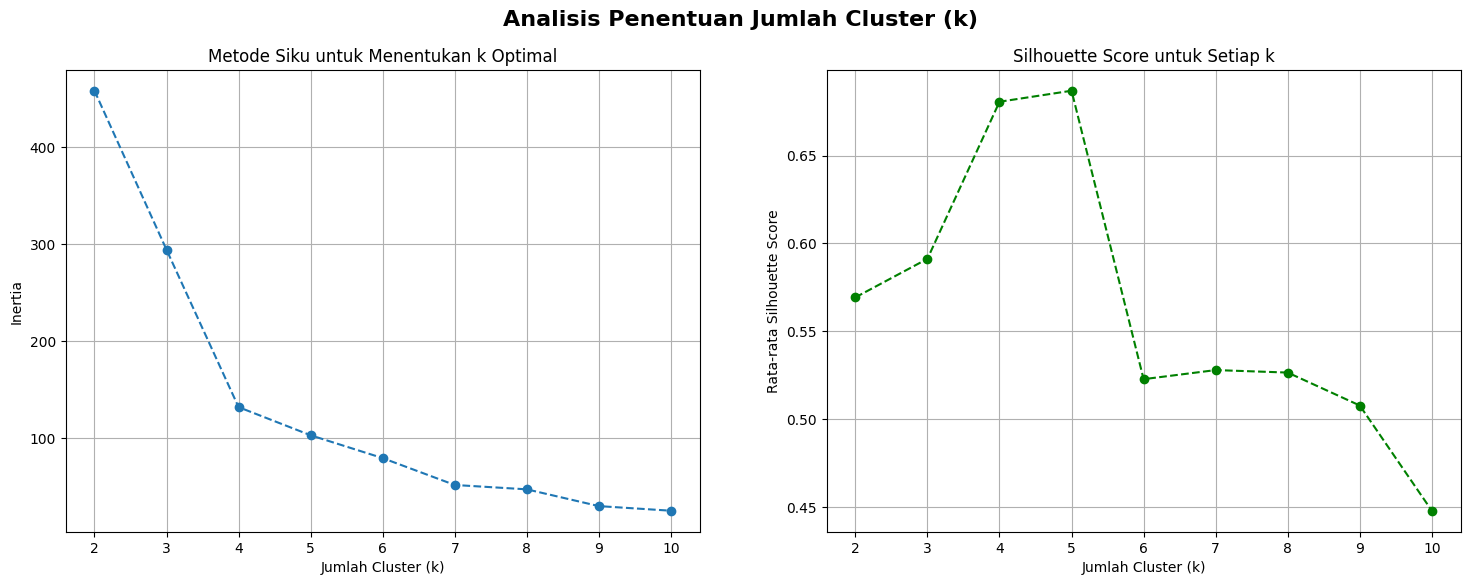

In [13]:
if X_scaled is not None:
    inertia = []
    silhouette_scores = [] # BARU: List untuk menyimpan silhouette scores
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X_scaled)
        
        # Hitung Inertia (untuk Metode Siku)
        inertia.append(kmeans.inertia_)
        
        # BARU: Hitung Silhouette Score
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

    # BARU: Membuat 2 plot berdampingan untuk perbandingan
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 1: Metode Siku
    axes[0].plot(k_range, inertia, marker='o', linestyle='--')
    axes[0].set_xlabel('Jumlah Cluster (k)')
    axes[0].set_ylabel('Inertia')
    axes[0].set_title('Metode Siku untuk Menentukan k Optimal')
    axes[0].grid(True)
    axes[0].set_xticks(k_range)

    # Plot 2: Silhouette Score
    axes[1].plot(k_range, silhouette_scores, marker='o', linestyle='--', color='g')
    axes[1].set_xlabel('Jumlah Cluster (k)')
    axes[1].set_ylabel('Rata-rata Silhouette Score')
    axes[1].set_title('Silhouette Score untuk Setiap k')
    axes[1].grid(True)
    axes[1].set_xticks(k_range)

    plt.suptitle('Analisis Penentuan Jumlah Cluster (k)', fontsize=16, weight='bold')
    plt.show()

Menjalankan K-Means dengan k=5...

--- VISUALISASI HASIL CLUSTERING ---


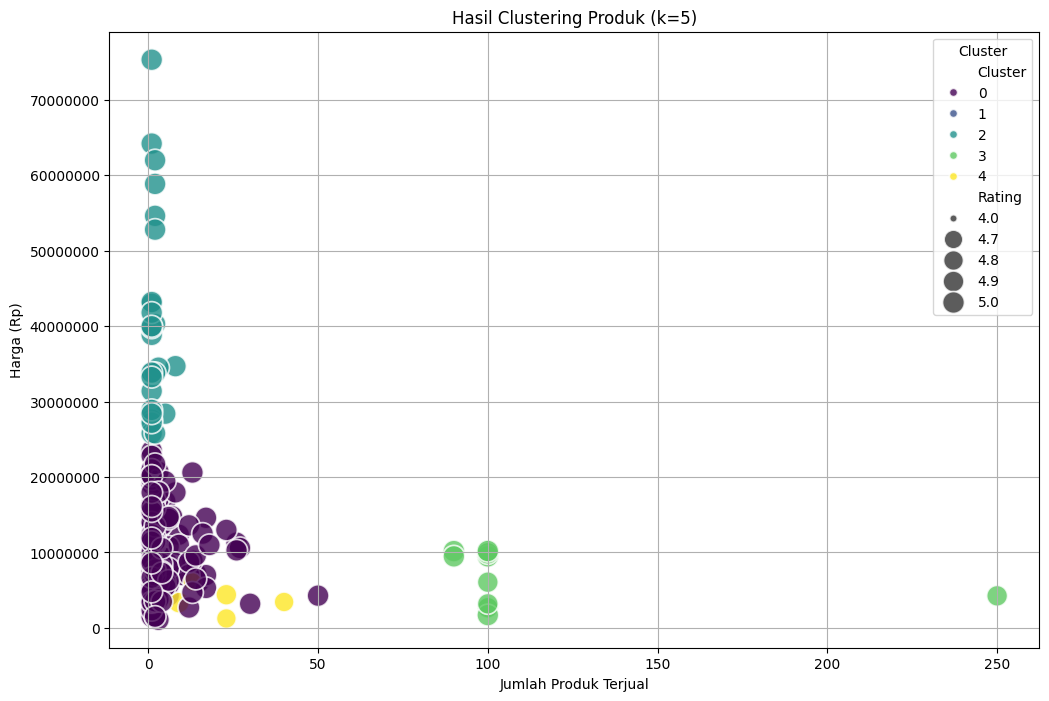

In [20]:
K_OPTIMAL = 5

if df_clean is not None:
    print(f"Menjalankan K-Means dengan k={K_OPTIMAL}...")
    kmeans = KMeans(n_clusters=K_OPTIMAL, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)

    # Tambahkan label cluster ke DataFrame asli
    df_clean['Cluster'] = kmeans.labels_

    # Visualisasi hasil clustering
    print("\n--- VISUALISASI HASIL CLUSTERING ---")
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df_clean,
        x='Terjual',
        y='Harga',
        hue='Cluster',
        palette='viridis',
        size='Rating',
        sizes=(30, 250),
        alpha=0.8
    )
    plt.title(f'Hasil Clustering Produk (k={K_OPTIMAL})')
    plt.xlabel('Jumlah Produk Terjual')
    plt.ylabel('Harga (Rp)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

In [21]:
cluster_profiles = df_clean.groupby('Cluster')[['Harga', 'Rating', 'Terjual']].mean().sort_values(by='Harga')
display(cluster_profiles)

,Harga,Rating,Terjual
Cluster,,,
4,3.707000e+06,4.820000,21.600000
3,6.678850e+06,4.958333,110.833333
0,9.568132e+06,5.000000,4.738854
1,2.050000e+07,4.000000,2.000000
2,4.007885e+07,5.000000,1.740741


In [24]:
for cluster_num in sorted(df_clean['Cluster'].unique()):
    print(f"\n--- CONTOH PRODUK DARI CLUSTER {cluster_num} ---")
    
    # Ambil 5 sampel produk dari cluster ini
    sampel_produk = df_clean[df_clean['Cluster'] == cluster_num].head()
    
    display(sampel_produk[['Nama Produk', 'Harga', 'Rating', 'Terjual']])


--- CONTOH PRODUK DARI CLUSTER 0 ---


,Nama Produk,Harga,Rating,Terjual
8,Komputer PC All-in-One Baru Layar Lengkung Gam...,4883700,5.0,1.0
11,pc gaming core i5,1500000,5.0,1.0
19,Komputer PC Gaming 1 jutaaan Fullset Siap Paka...,1490000,5.0,2.0
20,1STPLAYER ARMOUR 750W Gaming PSU | PS-750AR 80...,1084888,5.0,3.0
24,Komputer pc design dan gaming fullset bisa wif...,3450000,5.0,2.0



--- CONTOH PRODUK DARI CLUSTER 1 ---


,Nama Produk,Harga,Rating,Terjual
255,[Baru] CPU Komputer/PC Ryzen 7 9700 X RAM 64GB...,20500000,4.0,2.0



--- CONTOH PRODUK DARI CLUSTER 2 ---


,Nama Produk,Harga,Rating,Terjual
14,ASUS ROG NUC 760 NUC14SRKU7 - Ultra 7 155H/16G...,28399000,5.0,5.0
32,PC Gaming Intel i9 14900K | RTX 5080 16GB | 32...,42970000,5.0,1.0
35,AGRES PYRO PC RYZEN 7 9700X RTX 5080 16GB/ 32G...,34700000,5.0,8.0
36,AGRES PYRO PC RYZEN 7 9800X3D RTX 5080 16GB/ 3...,40300000,5.0,2.0
37,PC Build AMD Ryzen 9 9800X3D | 64GB DDR5 | SSD...,64210000,5.0,1.0



--- CONTOH PRODUK DARI CLUSTER 3 ---


,Nama Produk,Harga,Rating,Terjual
3,PC GAMING INTEL CORE I3 10100F Gen 10 TERBARU,2850000,4.9,100.0
136,PC RAKIT BlackVenom | RTX 5060 TI 5050 | AMD R...,10185000,5.0,100.0
137,PC RAKIT BlackVenom | RTX 5060 TI 5050 | I7 12...,9485000,5.0,100.0
144,PC RAKIT Dewa FPS | RTX 5060 TI 5050 | I7 1270...,9890000,5.0,100.0
145,PC RAKIT LightSpeedX | RTX 5060 TI 5050 | RYZE...,10190000,5.0,100.0



--- CONTOH PRODUK DARI CLUSTER 4 ---


,Nama Produk,Harga,Rating,Terjual
7,[Bekas]PC Rakitan Gaming VGA Siap UNBK Kantor ...,1250000,4.8,23.0
169,PC Rakitan Intel Core i3 10105F Gen 10 ( RTX 3...,3435000,4.8,40.0
336,FULLSET PC GAMING RYZEN 7 5700G I 16GB I NVME ...,6100000,4.7,13.0
401,PC Gaming Mantap Intel Core i5,4400000,4.9,23.0
414,PC Gaming Intel Core i5 3470 | Ram 8GB | HDD 5...,3350000,4.9,9.0
